In [66]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [67]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [68]:
import sys
from termcolor import colored, cprint
from mlxtend.plotting import plot_decision_regions

**Importing the dataset**

In [69]:
data=pd.read_csv('/content/Social_Network_Ads.csv')

In [70]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


**Splitting the dataset into the Training set and Test set**

In [71]:
x=data[['Age','EstimatedSalary']].values
y=data['Purchased'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

**Feature Scaling**

In [72]:
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.transform(x_test)


**Fitting K-NN to the Training set**

In [94]:
for i in [1,2,3,4,10,20,30,40,50]:
  knn=KNeighborsClassifier(i)
  knn.fit(x_train,y_train) 
  print(f"k value: {i}, cross val score : {round(np.mean((cross_val_score(knn, x_train, y_train, cv=10))*100),2)}, Test score: {round((knn.score(x_test,y_test)*100),2)}")
  print('*'*50)



k value: 1, cross val score : 84.64, Test score: 89.17
**************************************************
k value: 2, cross val score : 85.0, Test score: 87.5
**************************************************
k value: 3, cross val score : 87.86, Test score: 90.83
**************************************************
k value: 4, cross val score : 87.14, Test score: 91.67
**************************************************
k value: 10, cross val score : 90.0, Test score: 92.5
**************************************************
k value: 20, cross val score : 89.64, Test score: 91.67
**************************************************
k value: 30, cross val score : 89.64, Test score: 92.5
**************************************************
k value: 40, cross val score : 88.93, Test score: 91.67
**************************************************
k value: 50, cross val score : 87.14, Test score: 88.33
**************************************************


***K=10 is giving a good test score***

In [74]:
#considering k=10 as a best value according to previous results
k=[10]
knn=KNeighborsClassifier(10)
knn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=10)

**Predicting the Test set results**

In [75]:
cprint(f"cross validation score of {k[0]}-NN model is: {int(round(np.mean(cross_val_score(knn, x_test, y_test, cv=10)*100),0))}%",'blue','on_white',attrs=['bold','dark'])
y_pred=knn.predict(x_test)
print('-'*110)
cprint(f'The predicted test data result is: {y_pred}','blue', 'on_yellow',attrs=['bold','dark'])

cross validation score of 10-NN model is: 90%
--------------------------------------------------------------------------------------------------------------
The predicted test data result is: [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 0 0 0 0 0
 0 0 1 1 0 1 0 0 1]


**Making the Confusion Matrix**

In [76]:
from sklearn.metrics import confusion_matrix

In [77]:
matrix=confusion_matrix(y_test,y_pred)
matrix

array([[74,  5],
       [ 4, 37]])

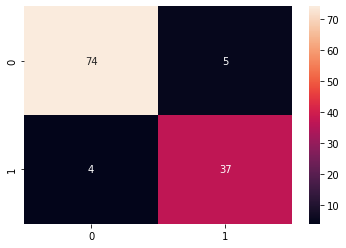

In [78]:
import seaborn as sns
sns.heatmap(matrix,annot=True)